<div style="width: 100%; display: flex; justify-content: space-between; align-items: center;">
    <h1 style="color: black;">
        Workshop:<br>
        <b>Datenauswertung mit Python<br>und Jupyter Notebooks</b>
    </h1>
    <div style="width: 7rem; padding-right: 2rem; margin: .5rem;">
        <img src="https://www.dpg-physik.de/veranstaltungen/2022/wissenschaftskommunikation-und-fachdidaktik/@@images/logo/thumb" style="width: 100%;"> 
        <div style="width: 100%; margin-top: .5rem; font-size: 1.2rem; font-weight: bold; color: #00519D; text-align: center;">
            RG Bonn
        </div>
    </div>
</div>

---


## Einführung

Ziel dieses Workshops ist es, ...

Der Workshop gliedert sich in folgende Teilbereiche:

- **Teil 1:** Einlesen von Daten
- **Teil 2:** Zugriff auf DataFrames und Arrays
- **Teil 3:** Rechnen mit Arrays
- **Teil 4:** Visualisierung von Daten
- **Teil 5:** Anpassung von Modellen an Daten
- **Teil 6:** Datenexport in LaTeX-Tabellen

Als roter Faden dient folgendes Beispiel:

Ein Detektor für $\gamma$-Strahlung ordnet jedes detektierte $\gamma$-Teilchen abhängig von seiner Energie einem von 8192 Kanälen zu. Aus der Anzahl der detektierten Teilchen pro Kanal kann ein Spektrum erstellt werden. Welcher Kanal zu welcher Energie gehört ist jedoch _nicht_ bekannt. Um diese Abhängigkeit zu bestimmen, muss somit eine **Energiekalibration** anhand einer Probe mit bereits bekannten Zerfallsenergien durchgeführt werden. In unserem Fall wurde eine Europium-152-Quelle vermessen. Die Messdaten sind in der Datei `data/Eu152.csv` gespeichert, wobei die erste Spalte die Kanalnummer und die zweite Spalte die Teilchenzahl enthält.

---

## Teil 1: Einlesen von Daten

Das erste, was bei einer typischen Datenauswertung getan wird, ist das Einlesen der Messdaten. Dazu bietet sich das Paket [pandas](https://pandas.pydata.org/) an, welches in der Regel mit dem Kürzel `pd` importiert wird. In diesem Paket arbeitet man mit sogenannten `DataFrame`-Objekten, welche wie Tabellen aufgebaut sind, das heißt jedem enthaltenen Wert kann eine Zeile und eine Spalte zugeordnet werden. Zum Einlesen wird die Funktion `read_csv` verwendet, welche als Argument den Pfad der Datei erhält. Die erste Zeile der Datei wird automatisch als Spaltenüberschrift interpretiert. Da die Spalten in unserer Datei nicht durch Kommata, sondern durch Tabs getrennt sind, muss zudem das Argument `sep='\t'` angegeben werden.


In [1]:
import pandas as pd

# Daten einlesen
data = pd.read_csv("data/Eu152.csv", sep="\t")

# Daten anzeigen
data

,K,N
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
8187,8187,0
8188,8188,0
8189,8189,0
8190,8190,0


Wie man erkennen kann, wurden die Daten erfolgreich eingelesen und sind nun in der Variable `data` als `DataFrame` abgelegt.

> TODO: Hier vielleicht noch mehr Optionen von `read_csv` erklären, z.B. `header`, `delimiter`, `names` oder `index_col`?


Zunächst schauen wir uns die Daten einmal an. Dazu könne wir zunächst einmal die `plot`-Methode des DataFrames verwenden. Diese trägt die alle Nicht-Index-Spalten (hier nur N) gegen die Index-Spalte (hier K) auf. Zur Darstellung selbst kommen wir später noch.


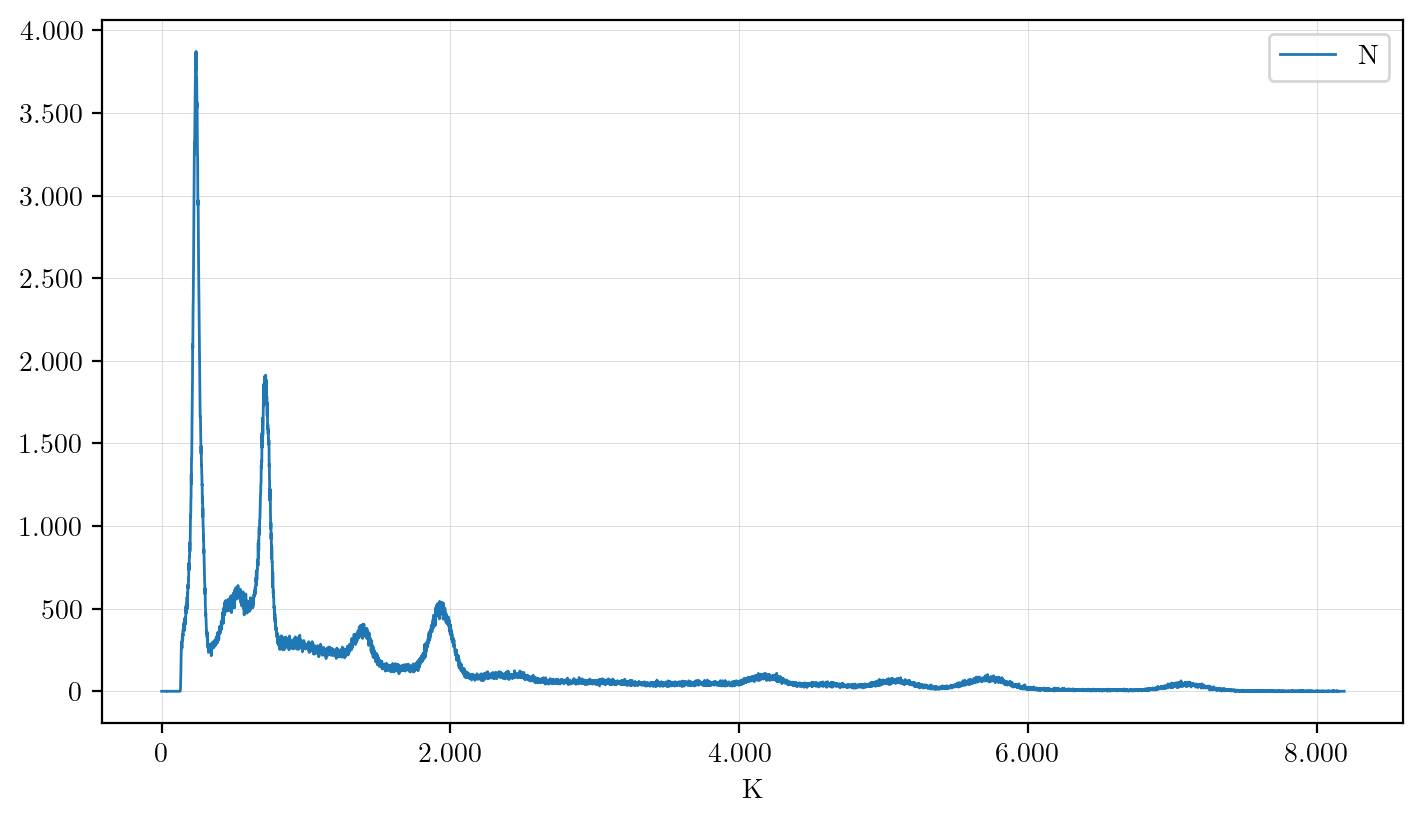

In [2]:
data.plot("K", "N"); # type: ignore

Wir erkennen hohe Peaks im Bereich $K < 2200$ und ein paar flache Peaks bei $K > 4000$. Zur Einfachheit werden hier auschließlich die beiden Peaks im Bereich $1100 < K < 2200$ ausgewertet. Wie filtern wir nun unsere Daten, sodass nur noch die gewünschten Datenpunkte enthalten sind?

---

## Teil 2: Umgang mit DataFrames und Arrays

### DataFrames

Wie können wir nun auf die Daten im eingelesenen DataFrame zugreifen? Meist möchten wir eine bestimmte Spalte aus der Tabelle weiterverarbeiten. Um beispielsweise auf die Teilchenzahlen $N$ als Numpy-Array zuzugreifen können wir schreiben:


In [3]:
data["N"].to_numpy()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Hier passiert folgendes: `data['N']` gibt die Spalte mit Name "N" als `Series`-Objekt zurück. Da es in der Regel einfacher ist, stets einheitlich mit Numpy-Arrays zu arbeiten, wird die `Series` mit der `to_numpy()`-Methode in ein solches umgewandelt. Um das gesamte DataFrame in ein zweidimensionales Numpy-Array umzuwandeln, schreibt man:


In [4]:
data.to_numpy()

array([[   0,    0],
       [   1,    0],
       [   2,    0],
       ...,
       [8189,    0],
       [8190,    0],
       [8191,    0]], dtype=int64)

Transponiert man nun dieses Array, so entsprechen die Zeilen den Spalten und umgekehrt. Dies kann dazu genutzt werden, um die Spalten in Variablen zu "entpacken":


In [5]:
K, N = data.to_numpy().T

### Zugriff auf Array-Elemente

Auf einzelne Werte eines Arrays kann man wie folgt zugreifen:


In [6]:
# Element mit Index 420
N[420]

432

In [7]:
# Erstes Element
N[0]

0

In [8]:
# Letztes Element
N[-1]

0

In [9]:
# Drittletztes Element
N[-3]

0

### Zugriff auf Teilbereiche eines Arrays

Auf Teil-Arrays kann mit dem sogenanntem "Slicing" zugegriffen werden:


In [10]:
# Element 500 bis (aber ohne) Element 510
N[500:510]

array([573, 580, 552, 598, 573, 611, 505, 600, 556, 604], dtype=int64)

In [11]:
# Erstes Element bis (aber ohne) Element 10
N[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
# Zehntletztes bis (inklusive) letztes Element
N[-10:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
# Jedes zweite Element
N[::2]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Zugriff auf Elemente, die bestimmte Bedingungen erfüllen

In [14]:
# Alle Elemente, die größer als 3000 sind
N[N > 3700]

array([3707, 3805, 3797, 3757, 3871, 3782, 3869, 3727, 3716, 3716],
      dtype=int64)

In [15]:
# Alle Elemente, die zwischen 2700 und 3000 liegen
N[(N > 2700) & (N < 3000)]

array([2761, 2811, 2923, 2947, 2943, 2972, 2822], dtype=int64)

> **Achtung:** Hier kann leider nicht die Notation `2000 < N < 3000` verwendet werden, wie es bei einzelnen Werten möglich ist. TODO: Erklärung? Oder zu tiefgehend?


In [16]:
# Alle Kanalnummern, bei denen die Teilchenzahl größer als 3700 ist
K[N > 3700]

array([234, 235, 236, 237, 238, 239, 240, 241, 242, 243], dtype=int64)

Auch DataFrames können auf diese Weise gefiltert werden:


In [17]:
data[data["N"] > 3700]

,K,N
234,234,3707
235,235,3805
236,236,3797
237,237,3757
238,238,3871
239,239,3782
240,240,3869
241,241,3727
242,242,3716
243,243,3716


### Beispiel: Energiekalibration

Wie zuvor bereits angesprochen, möchten wir ausschließlich die hohen Peaks des Spektrums bei $K < 2100$ auswerten. Dazu filtern wir unsere Arrays wir folgt:


In [18]:
N = N[(K > 1100) & (K < 2200)]
K = K[(K > 1100) & (K < 2200)]

> **Vorsicht:** Hier ist es wichtig, dass wir erst `N` und danach `K` filtern. Würden wir erst `K` filtern, so hätte `K` danach eine andere Länge als `N` und könnte nicht mehr als Mask verwendet werden. Alternativ könnte man auch zunächst eine Variable `mask = (K > 140) & (K < 2100)` definieren und dann mit `K[mask]` und `N[mask]` filtern.

Alternativ hätten wir auch vor der Erstellung der Array das DataFrame filtern können:


In [19]:
data = data[(data["K"] > 1100) & (data["K"] < 2200)]

---

## Teil 3: Rechnen mit Arrays

Im Modul `numpy` sind viele mathematische Funktionen zum Rechnen mit Arrays enthalten. Am wichtigsten sind wahrscheinlich die arithmetischen Operationen `+`, `-`, `*`, `/`, `**`, welche jeweils elementweise auf das Array angewendet werden. Im folgenden einige Beispiele:


In [20]:
# Addiere 42 auf jedes Element
N + 42

array([327, 272, 321, ..., 137, 135, 116], dtype=int64)

In [21]:
# Multipliziere jedes Element mit 2
N * 2

array([570, 460, 558, ..., 190, 186, 148], dtype=int64)

In [22]:
# Multipliziere jedes Element von N mit dem entsprechenden Element von K
N * K

array([313785, 253460, 307737, ..., 208715, 204414, 162726], dtype=int64)

In [23]:
import numpy as np

# Wende die Sinus-Funktion auf jedes Element an
np.sin(N)

array([ 0.77387159, -0.6160642 ,  0.56608279, ...,  0.68326171,
       -0.94828214, -0.98514626])

TODO: Weitere wichtige Dinge?


### Beispiel: Energiekalibration

Zur physikalisch korrekten Analyse möchten wir die Fehler der Messdaten bestimmen.
Der Fehler der Teilchenzahl kann aufgrund des statistischen Verhaltens auf $\Delta N = \sqrt{N}$ abegschätzt werden:


In [24]:
N_err = np.sqrt(N)

Die Kanalnummern sind durch ganze Zahlen gegeben, weshalb ein Fehler von $\Delta K = 0{,}5$ naheliegend ist. Nun könnte man einfach `K_err = 0.5` setzen, jedoch ist es bei den meisten Auswertungsschritten hilfreich, auch für die Fehlerwerte ein Array zu erstellen mit der gleichen Länge wie das Werte-Array:


In [25]:
K_err = np.full(len(K), 0.5)

---

## Teil 4: Visualisierung von Daten

### Einfache Plots

Zur Visualisierung der Daten bietet sich das Paket `matplotlib` an. Dieses wird üblicherweise wie folgt importiert:


In [26]:
import matplotlib.pylab as plt

In Matplotlib arbeitet man mit folgenden Objekten:

- `Figure`: Repräsentiert die gesamte "Zeichnung" des Plots
- `Axes`: Repräsentiert eine Gruppe von Achsen (typischerweise x- und y-Achse). Ein `Axes`-Objekt kann auch als Graph interpretiert werden.

Eine Figure mit einem Graphen kann man mit `plt.subplots()` erstellen. Auf den Graphen kann man dann mit verschiedenen Funktionen zeichnen. Die wichtigste Funktion ist die `plot`-Funktion, welche wie folgt verwendet wird:


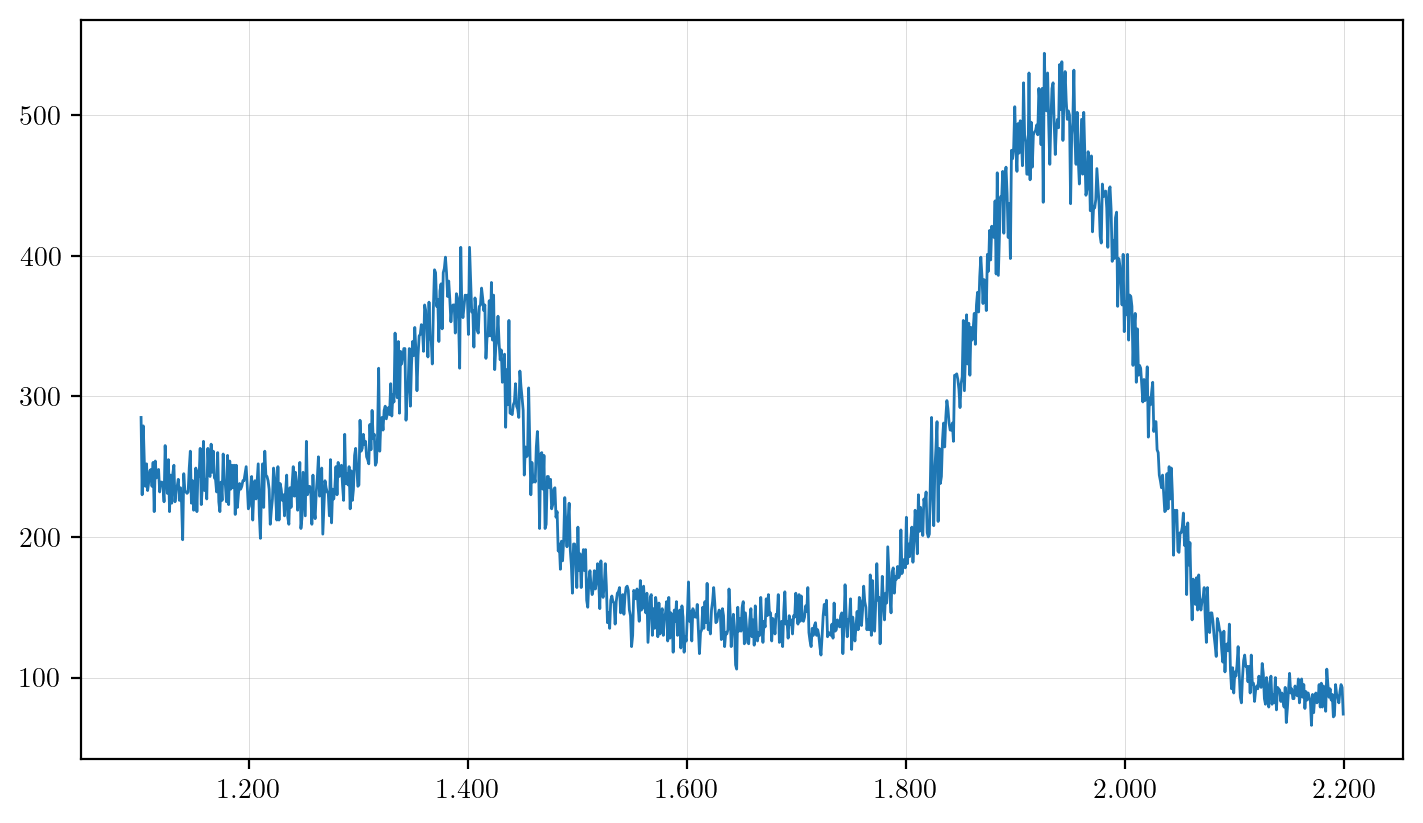

In [27]:
fig, ax = plt.subplots()
ax.plot(K, N)

> **Hinweis:** Wenn bei euch in der Ausgabe etwas wie zum Beispiel `[<matplotlib.lines.Line2D at ...>]` steht, dann liegt das lediglich daran, dass Jupyter-Notebooks stets den Wert der letzten Zeile ausgeben, welches in dem Fall ein `matplotlib`-Objekt ist. Entweder könnt ihr dies ignorieren oder die Ausgabe mit einem Semikolon am Ende der letzten Zeile unterdrücken.


Bevor jetzt jemand fragt, auf welcher Achse Äpfel und auf welcher Birnen aufgetragen sind, fügen wir lieber schnell noch Achsenbeschriftungen hinzu:


Text(0, 0.5, 'Teilchenzahl $N$')

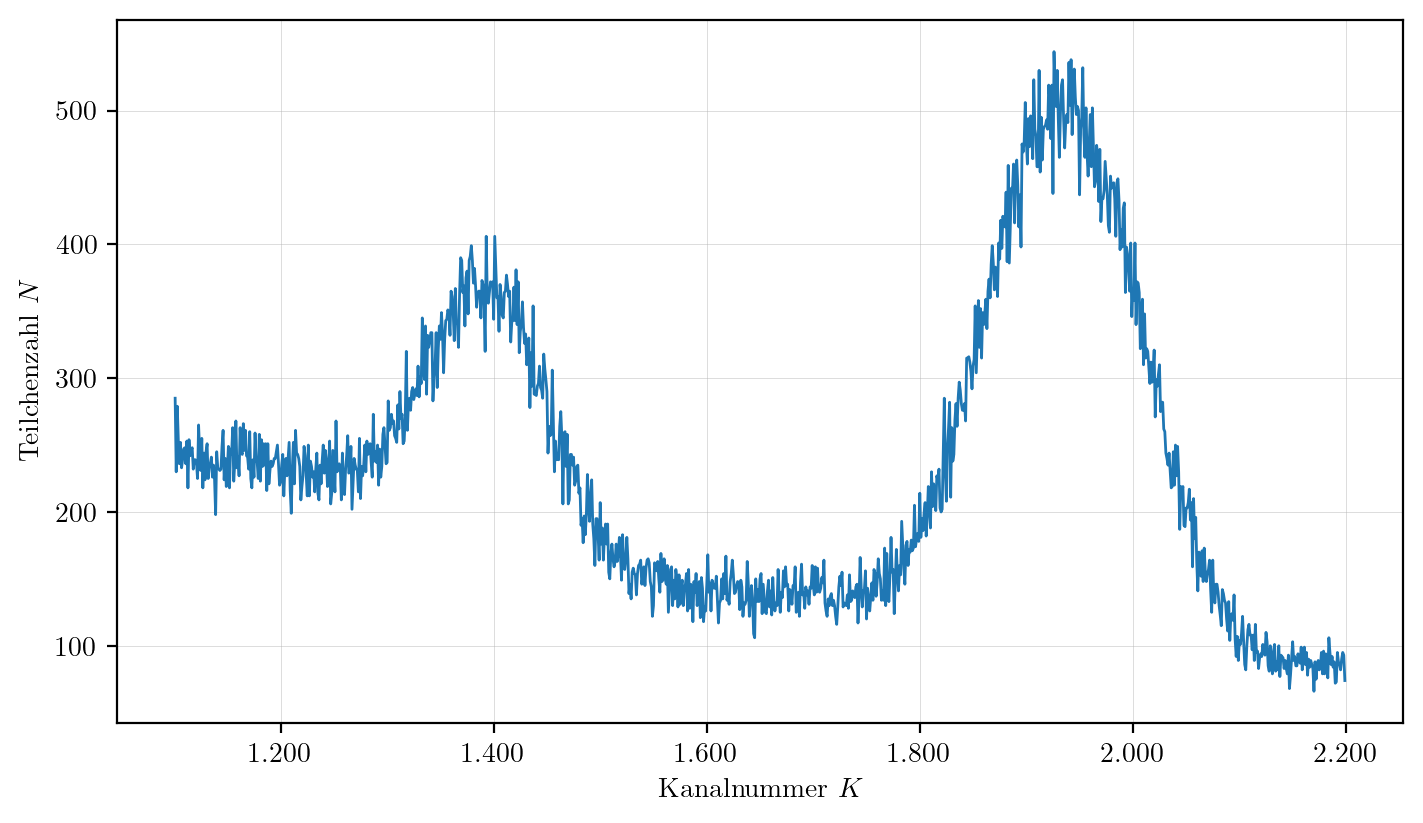

In [28]:
fig, ax = plt.subplots()
ax.plot(K, N)
ax.set_xlabel("Kanalnummer $K$")
ax.set_ylabel("Teilchenzahl $N$")

Gibt man keine weiteren Argumente an, so verbindet die plot-Funktion die Datenpunkte mit Linien.
Bei gemessenen Daten ist es meist jedoch sinnvoller, ausschließlich die Punkte einzuzeichnen. Um dies zu erreichen, kann der plot-Funktion ein String als drittes Argument übergeben werden, welches das Punkt- bzw. Linienformat angibt. Die möglichen Formate sind [hier](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) im Abschnitt "Format Strings" beschrieben.
Um schwarze Punkte ohne Verbindungslinien zu plotten, kann das Format `".k"` verwendet werden, wobei `.` das Punktformat und `k` die Farbe Schwarz spezifiziert. Da wir hier eine große Menge an Datenpunkten haben, macht es sinn die Größe der Plotpunkte zu verringern. Dies geschieht mit dem Argument `ms` (oder `markersize`).


Text(0, 0.5, 'Teilchenzahl $N$')

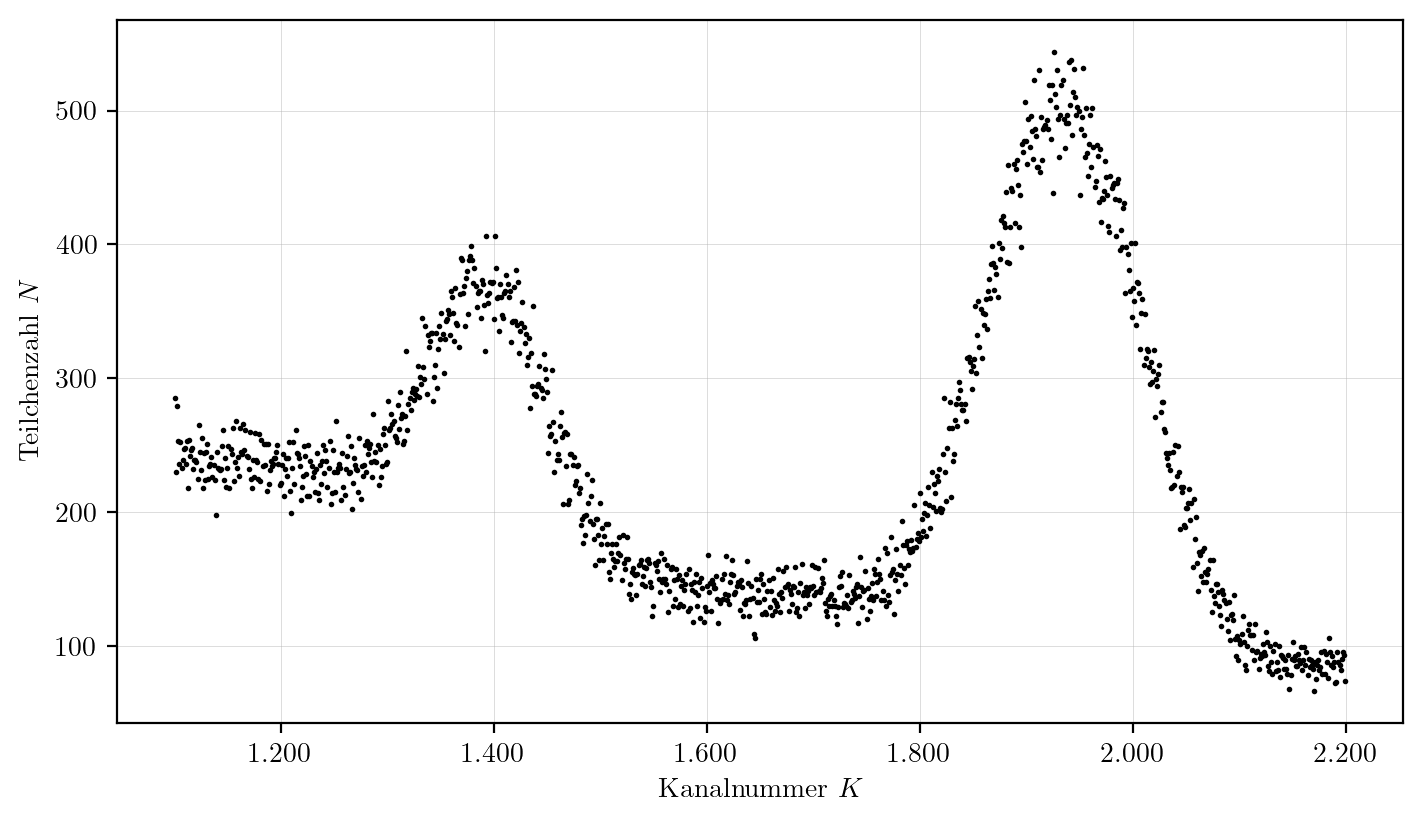

In [29]:
fig, ax = plt.subplots()
ax.plot(K, N, ".k", ms=2)  # <-- kleine schwarze Punkte
ax.set_xlabel("Kanalnummer $K$")
ax.set_ylabel("Teilchenzahl $N$")

### Plot-Styles

Da der Standardstil der Matplotlib-Plots nicht unbedingt ansprechend ist, ist es sinnvoll diesen Stil anzupassen. Dies ist einerseits mit der Variable `plt.rcParams` möglich, welche die Konfiguration von Matplotlib als Dictionary enthält. Sie kann mit `plt.rcParams.update(...)` angepasst werden. Andererseits kann auch im Ordner, wo das Notebook gespeichert ist eine Datei mit dem Namen `matplotlibrc` angelegt werden, in der die entsprechenden Optionen angegeben werden (siehe [hier](https://matplotlib.org/stable/tutorials/introductory/customizing.html#the-matplotlibrc-file)). Es liegt bereits eine Datei `matplotlibrc_example` mit ein paar (unserer Meinung nach) sinnvollen Einstellungen in diesem Ordner. Um diese zu verwenden, muss die Datei in `matplotlibrc` umbenannt werden.

Die Datei enthält unter anderem die Option `axes.formatter.use_locale: True`, welche dafür sorgt, dass ein Zahlenformat verwendet wird, das zur eingestellten Sprache passt. Um diese Sprache anzupassen, kann das `locale`-Modul verwendet werden:


In [30]:
import locale

locale.setlocale(locale.LC_ALL, "de_DE")

'de_DE'

> **Achtung:** Die `text.usetex`-Option kann zu Fehlermeldungen führen, falls die Plot-Beschriftungen nicht korrekt als LaTeX-Code interpretiert werden können. Falls ein solcher Fehler auftritt, sollte diese Option auf `False` gesetzt werden.


Abhängig vom Plot kann es sinnvoll sein, eine andere Bildgröße zu verwenden. Dazu kann man das `figsize`-Argument in der `subplots`-Funktion setzen. Das Spektrum kann man beispielsweise als breiteren Plot darstellen. Mit den obigen Anpassungen erhält man dann folgenden Plot:


Text(0, 0.5, 'Teilchenzahl $N$')

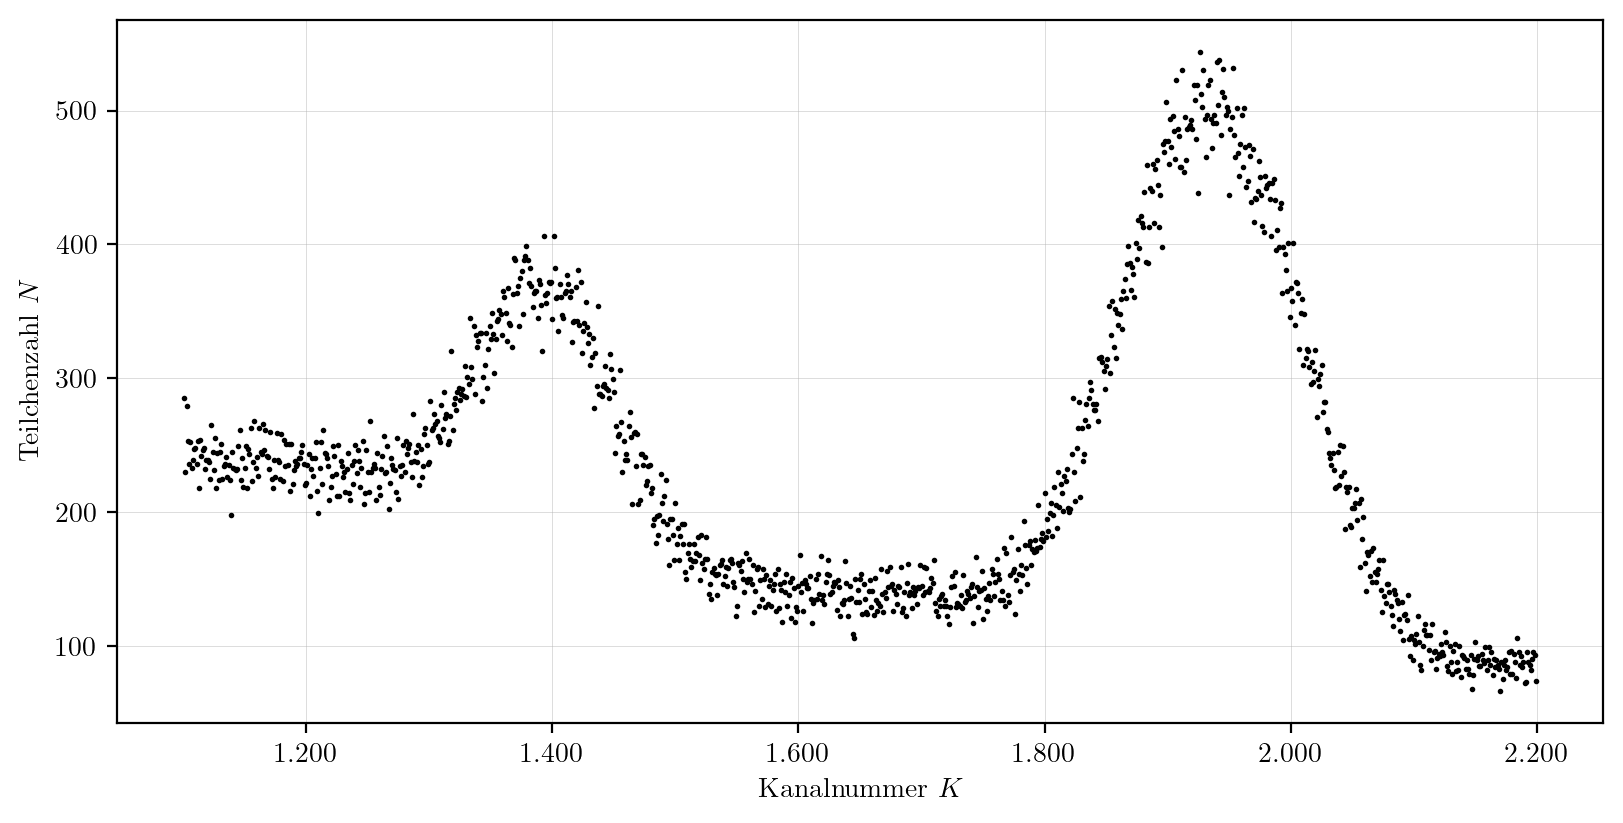

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))  # <-- Breite und Höhe in Zoll
ax.plot(K, N, ".k", ms=2)
ax.set_xlabel("Kanalnummer $K$")
ax.set_ylabel("Teilchenzahl $N$")

In diesem Plot würde das einzeichnen von Fehlerbalken nur die Übersichtlichkeit stören. Zum Einzeichnen von Fehlerbalken kommen wir in Teil 5 im Rahmen der Modellanpassung.

---

## Teil 4: Anpassung von Modellen an Daten

### Erstellung eines Modells
Bei physikalischen Untersuchungen liegt meist eine theoretische Erwartung vor, die experimentell zu überprüfen ist. Diese theoretische Erwartung hat in der Regel die Form einer Gleichung, die die untersuchten Variablen in Abhängigkeit voneinander beschreibt. Diese Gleichung wird dann als **Modell** bezeichnet. Im Falle des Energiespektrums wird jeder Peak $i$ durch eine Gaußkurve der Form

$$
\frac{A_i}{\sqrt{2\pi} \: \sigma_i} \cdot \exp \left( -\frac{(K - K_i)^2}{2 \sigma_i^2} \right)
$$

beschrieben, wobei $A_i$ die Amplitude, $\sigma_i$ die Breite und $K_i$ den Mittelwert des Peaks beschreibt. Zusätzlich zu den beiden Peaks ist ein Untergrund zu erkennen, welcher hier als linear angenähert wird.

Zur Anpassung dieses Modells können verschiedene Methoden bzw. Python-Module verwendet werden. Unserer Erfahrung nach eignet sich besonders für komplexe Modelle aus mehreren überlagerten Kurven das Paket `lmfit`. In diesem Paket sind die wichtigsten Modellfunktionen bereits implementiert und können beispielsweise durch Addition überlagert werden. Im Folgenden wird das oben beschriebene Modell für die beiden Peaks mit Untergrund erstellt:


In [32]:
import lmfit

# Peak-Modelle
peak1_model = lmfit.models.GaussianModel(prefix="peak1_")
peak2_model = lmfit.models.GaussianModel(prefix="peak2_")
# Untergrund-Modell (bg = background)
bg_model = lmfit.models.LinearModel(prefix="bg_")

# Gesamt-Modell
model = peak1_model + peak2_model + bg_model

Das Argument `prefix` dient dazu, dass es keine Konflikte bei den Namen der Parameter der beiden Gaußkurven gibt. Wir können uns die Parameter-Namen des Modells ausgeben lassen:


In [33]:
model.param_names

['peak1_amplitude',
 'peak1_center',
 'peak1_sigma',
 'peak2_amplitude',
 'peak2_center',
 'peak2_sigma',
 'bg_slope',
 'bg_intercept']

Wir sehen, dass die Parameter der Gaußkurven von lmfit als `amplitude`, `center` und `sigma` bezeichnet werden, während die Parameter des linearen Modells durch `slope` und `intercept` gegeben sind.


### Anpassung des Modells
Das Modell kann nun mit der `fit`-Methode an die Daten angepasst werden. Die reziproken Fehler können als Argument `weights` übergeben werden. Das zurückgegebene `ModelResult`-Objekt enthält alle relevanten Informationen über die Anpassung und kann übersichtlich im Notebook ausgegeben werden:

In [34]:
result = model.fit(N, x=K, weights=1 / N_err)
result

Die zusätzlichen Variablen `fwhm` und `height` für beide Peaks wurden von lmfit berechnet und beschreiben deren Breite (FWHM = full width at half maximum) bzw. Höhe. Die angepassten Werte aller Parameter können in der Spalte "value" abgelesen werden. Im Abschnitt "Fit Statistics" sind weitere Informationen über den Fit angegeben, unter anderem der (reduzierte) $\chi^2$-Wert. Zudem bietet lmfit eine einfache Möglichkeit, die angepasste Funktion und die Residuen grob darzustellen:


c:\Users\carlo\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


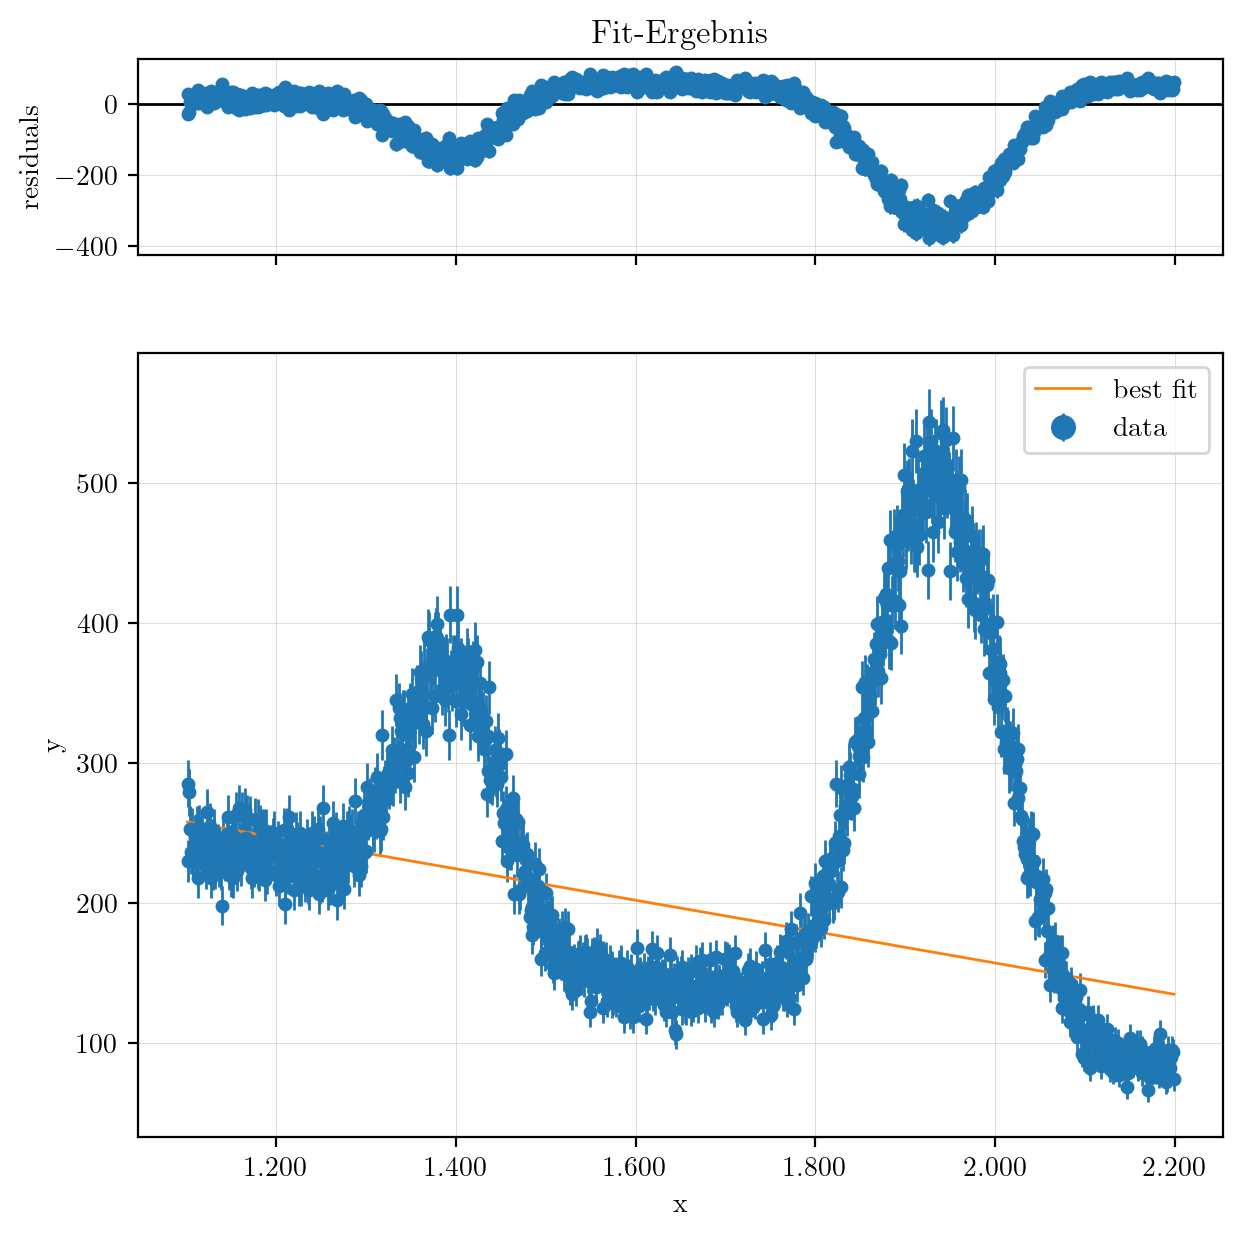

In [35]:
result.plot(title="Fit-Ergebnis"); # Gebe Titel an, da automatisch generierter Titel nicht als LaTeX interpretiert werden kann (Erinnerung: Option text.usetx ist aktiviert)

Man sieht, dass der Fit ohne weitere Anpassungen keine sinnvollen Ergebnisse liefert. Dies ist auch anhand der sehr hohen $\chi^2$-Werte zu erkennen. Da wir hier eine relativ große Anzahl an freien Parametern anpassen, sollten wir sinnvolle Startwerte und Grenzen definieren, damit die Anpassung besser konvergiert. Diese können beispielsweise aus den vorher erstellten Plots grob abgelesen werden und müssen in der Regel einige male variiert werden, bis ein sinnvolles Ergebnis herauskommt. Die Grenzen und Startwerte können mithilfe der `set_param_hint`-Methode im Modell definiert werden:

c:\Users\carlo\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


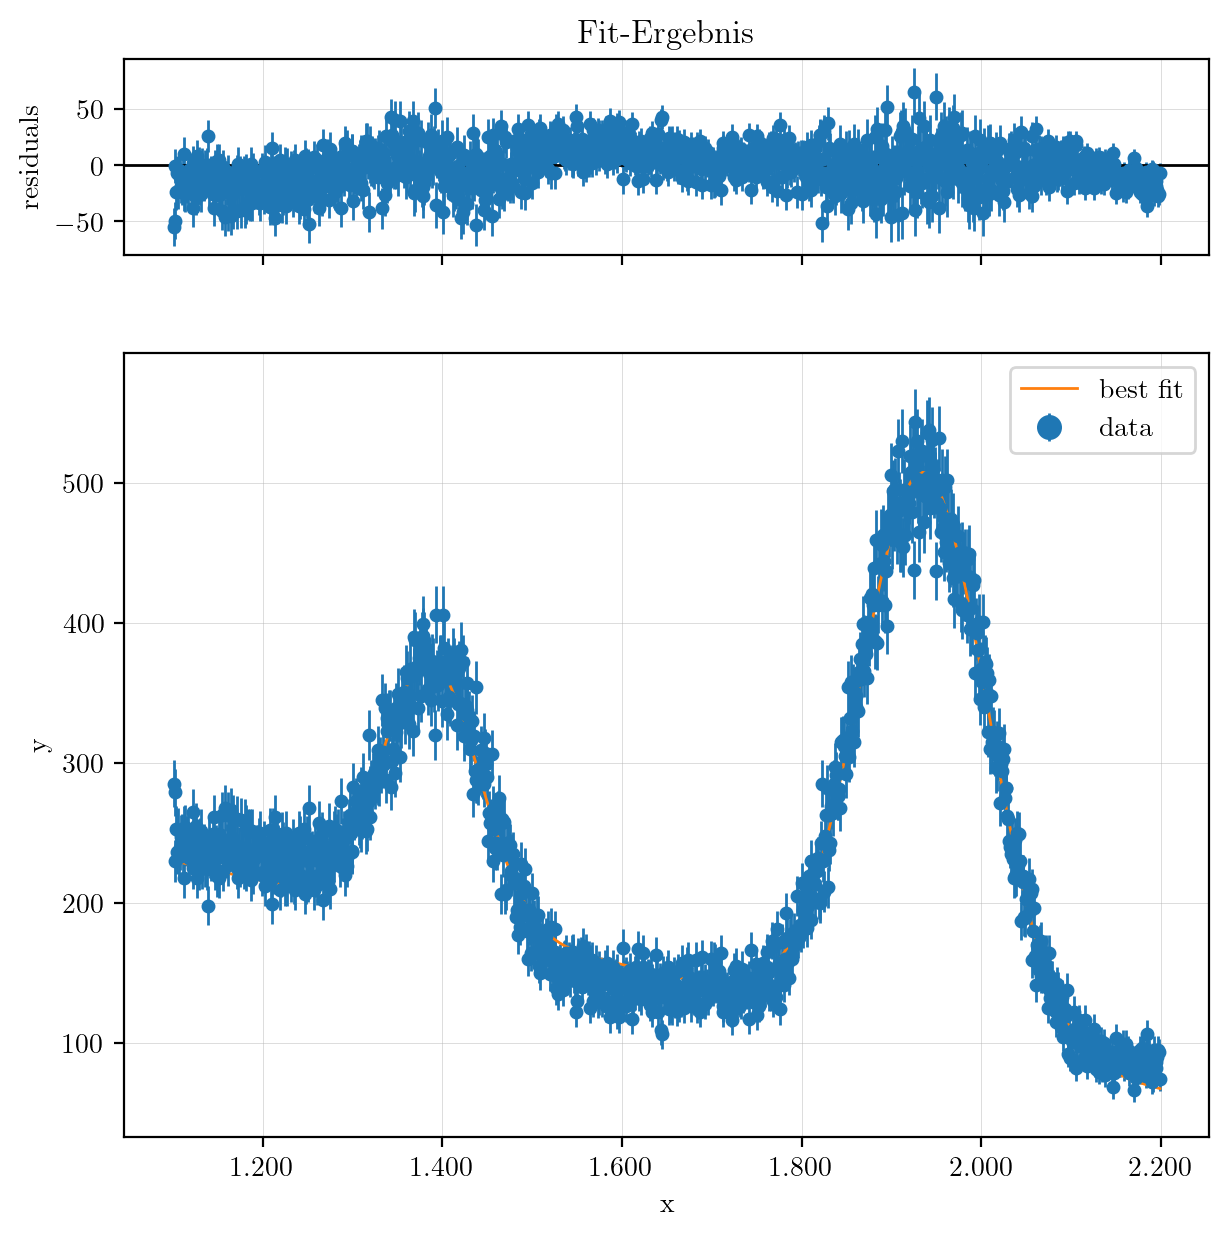

In [36]:
model.set_param_hint("peak1_center", value=1400, min=1300, max=1500)
model.set_param_hint("peak1_height", min=100)
model.set_param_hint("peak1_sigma", min=50, max=300)

model.set_param_hint("peak2_center", value=1900, min=1800, max=2000)
model.set_param_hint("peak2_height", min=100)
model.set_param_hint("peak2_sigma", min=50, max=300)

result = model.fit(N, x=K, weights=1 / N_err)
result.plot(title="Fit-Ergebnis");
result

Dieses Ergebnis sieht deutlich besser aus und auch der $\chi^2$-Wert liegt nun in der Nähe von 1.

### Zugriff auf die Fit-Ergebnisse
Die Werte und Fehler der Fit-Parameter können ausgegeben werden:

In [43]:
result.params

name,value,standard error,relative error,initial value,min,max,vary,expression
peak1_amplitude,24915.2985,452.153642,(1.81%),1.0,-inf,inf,True,
peak1_center,1387.25936,0.89235395,(0.06%),1400,1300.00000,1500.00000,True,
peak1_sigma,53.6645916,0.94686051,(1.76%),50,50.0000000,300.000000,True,
peak2_amplitude,71319.4831,558.674282,(0.78%),1.0,-inf,inf,True,
peak2_center,1936.59212,0.48901558,(0.03%),1900,1800.00000,2000.00000,True,
peak2_sigma,70.8258641,0.51886648,(0.73%),50,50.0000000,300.000000,True,
bg_slope,-0.14869768,0.00207091,(1.39%),0,-inf,inf,True,
bg_intercept,155.830884,0.76461062,(0.49%),0,-inf,inf,True,
peak1_fwhm,126.370454,2.22968605,(1.76%),117.74100000000001,-inf,inf,False,2.3548200*peak1_sigma
peak1_height,185.220202,2.97110069,(1.60%),100,100.000000,inf,False,"0.3989423*peak1_amplitude/max(1e-15, peak1_sigma)"


Auf einen bestimmten Parameter kann dann zugegriffen werden mittels:

In [47]:
peak1_center_param = result.params["peak1_center"]
peak1_center_param

<Parameter 'peak1_center', value=1387.2593631622274 +/- 0.892, bounds=[1300:1500]>

In [48]:
peak1_center_param.value

1387.2593631622274

In [51]:
peak1_center_param.stderr

0.8923539467431757

### Visualisierung der Fit-Ergebnisse

Zur Visualisierung des Fits können die einzelnen Komponenten des Modells, also die beiden Peaks und der Untegrund, getrennt voneinander geplottet werden:

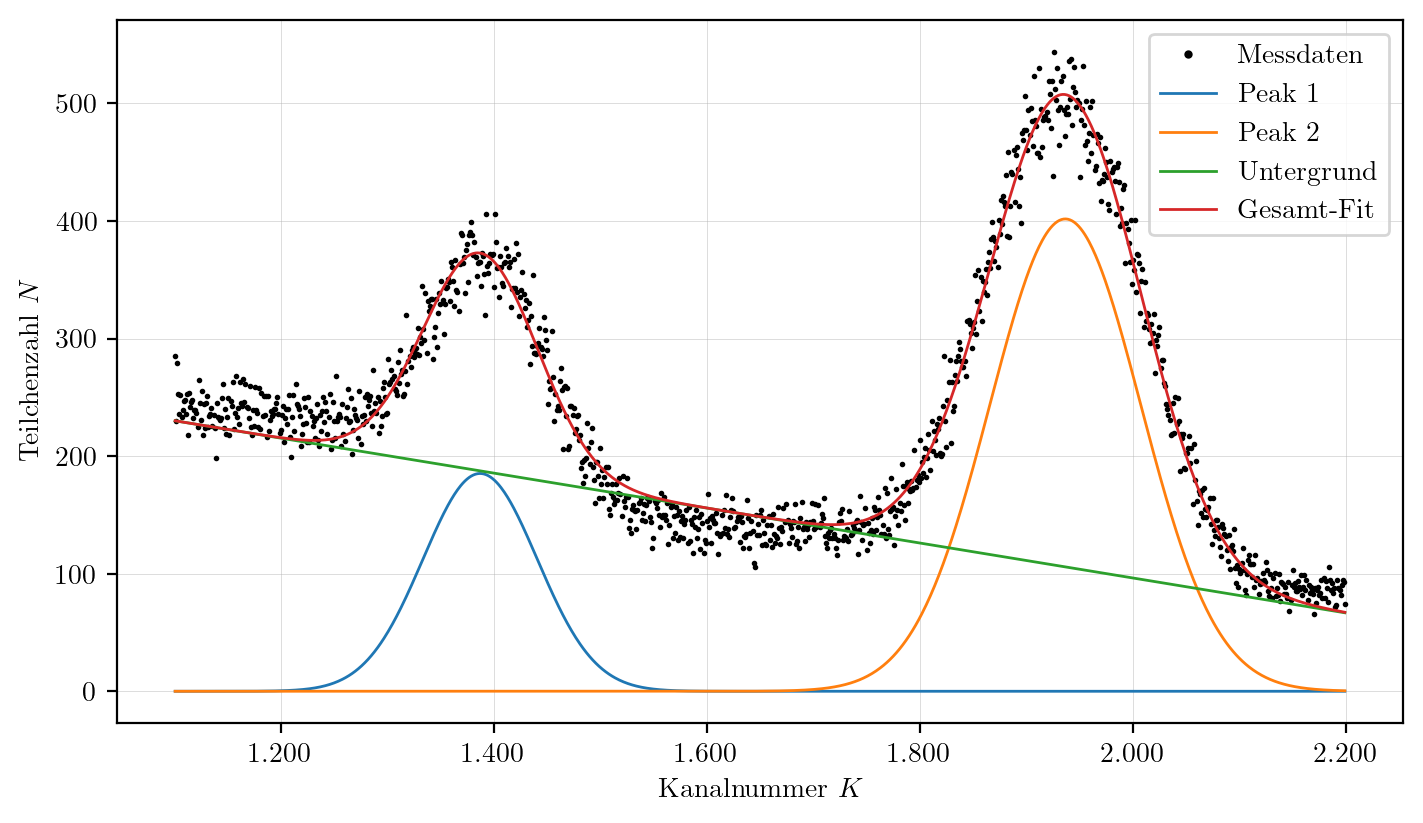

In [55]:
fig, ax = plt.subplots()
ax.plot(K, N, ".k", ms=2, label="Messdaten")

comps = result.eval_components(x=K)  # <-- Berechne einzelne Komponenten
ax.plot(K, comps["peak1_"], label="Peak 1")  # <-- ------------------
ax.plot(K, comps["peak2_"], label="Peak 2")  # <-- Plotte Komponenten
ax.plot(K, comps["bg_"], label="Untergrund") # <-- ------------------
ax.plot(K, result.best_fit, label="Gesamt-Fit")  # <-- Plotte Gesamt-Fit

ax.set_xlabel("Kanalnummer $K$")
ax.set_ylabel("Teilchenzahl $N$")
ax.legend();  # <-- Legende anzeigen

Zur weiteren Analyse wurden auch die anderen Peaks gefittet. Die Ergebnisse sind in der Datei `Eu152_peaks.csv` abgelegt.

TODO: Hier im Workshop das einlesen Wiederholen? Oder zu viel Aufwand?